![](https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png)

# Chasing cyclicities

## Table of Contents
* [Preamble](#preamble)
* [Data](#data)
* [Spectral and wavelet analysis](#analysis)
    * [Benthic record](#benthic)
    * [Planktonic record](#planktonic)
* [Relationship to insolation](#sol)

## <a name='preamble'>Preamble</a>

In this notebook, we demonstrate the use of the spectral and wavelet analysis features of [Pyleoclim](https://pyleoclim-util.readthedocs.io/en/master/index.html) using a sea surface temperature reconstruction from site ODP846 in the Eastern Equatorial Pacific. 

## <a name='data'>Data</a>

The record is described in:

* Mix, A. C., J. Le, and N. J. Shackleton (1995a), Benthic foraminiferal stable isotope stratigraphy from Site 846: 0–1.8 Ma, Proc. Ocean Drill. Program Sci. Results, 138, 839–847.
* Shackleton, N. J. (1995), New data on the evolution of Pliocene climate variability, in Paleoclimate and Evolution, With Emphasis on Human Origins, edited by E. S. Vrba et al., pp. 242-248, Yale Univ. Press, New Haven, CT.

The data were aligned to the Benthic Stack of [Lisiecki & Raymo (2005)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004PA001071) (LR04) using the [HMM-Match algorithm](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014PA002713) from [Khider et al, 2017](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2016PA003057). The latter is a probabilistic method that generates an ensemble of 1000 possible age models compatible with the chronostratigraphic constraints.

The dataset is stored in the Linked Paleo Data Format ([LiPD](https://lipd.net)).

Let's import this file into Pyleoclim and make a informational dashboard about the dataset.

In [1]:
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Pyleoclim can load LiPD files directly and store them as [`Lipd` objects](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#lipd-pyleoclim-lipd), which have some specific methods.

In [5]:
D = pyleo.Lipd('./data/ODP846.Lawrence.2006.lpd')

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: ODP846.Lawrence.2006.lpd
3.65 MB :That's a big file! This may take a while to load...
Finished read: 1 record


The next step is to isolate the time series of interest (in this case, the temperature record) and create a [`LipdSeries` object](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#lipdseries-pyleoclim-lipdseries). `LipdSeries` is itself a child of the [`Series` object](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#series-pyleoclim-series), which carries most of the functionalities of Pyleoclim. This means that all the methods applicable to `Series` are also applicable to `LipdSeries` (with some additional ones enabled by the additional metadata in a LiPD file).

In [6]:
ts = D.to_LipdSeries()

extracting paleoData...
extracting: ODP846.Lawrence.2006
Created time series: 18 entries
0 :  ODP846.Lawrence.2006 :  marine sediment :  site/hole
1 :  ODP846.Lawrence.2006 :  marine sediment :  section
2 :  ODP846.Lawrence.2006 :  marine sediment :  interval
3 :  ODP846.Lawrence.2006 :  marine sediment :  depth
4 :  ODP846.Lawrence.2006 :  marine sediment :  age
5 :  ODP846.Lawrence.2006 :  marine sediment :  temp prahl
6 :  ODP846.Lawrence.2006 :  marine sediment :  c37 total
7 :  ODP846.Lawrence.2006 :  marine sediment :  ukprime37
8 :  ODP846.Lawrence.2006 :  marine sediment :  temp muller
9 :  ODP846.Lawrence.2006 :  marine sediment :  event
10 :  ODP846.Lawrence.2006 :  marine sediment :  depth
11 :  ODP846.Lawrence.2006 :  marine sediment :  sample label
12 :  ODP846.Lawrence.2006 :  marine sediment :  depth comp
13 :  ODP846.Lawrence.2006 :  marine sediment :  depth cr
14 :  ODP846.Lawrence.2006 :  marine sediment :  c. wuellerstorfi d18o
15 :  ODP846.Lawrence.2006 :  marine se

Let's create a dashboard (a functionality specific to `LipdSeries`, which will give us a plot of the time series, the location of the record and a spectrum along with some specific metadata.

Performing spectral analysis on individual series: 100%|█| 200/200 [02:37<00:00,


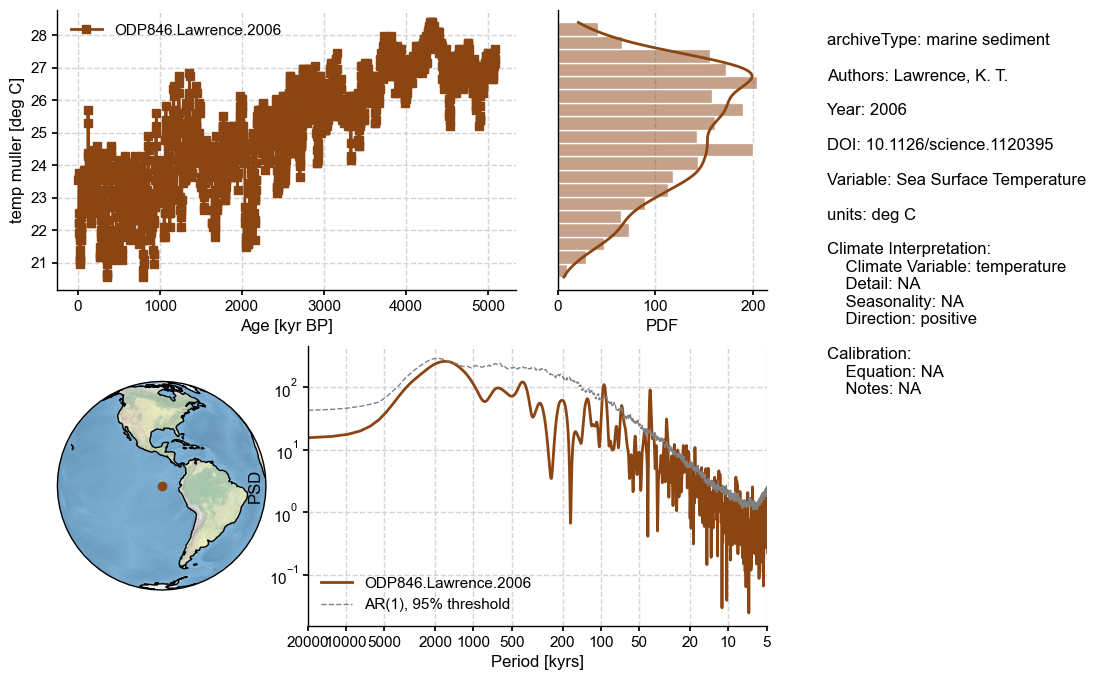

(<Figure size 1100x800 with 4 Axes>,
 {'ts': <AxesSubplot:xlabel='Age [kyr BP]', ylabel='temp muller [deg C]'>,
  'dts': <AxesSubplot:xlabel='PDF'>,
  'map': <GeoAxesSubplot:>,
  'spec': <AxesSubplot:xlabel='Period [kyrs]', ylabel='PSD'>})

In [4]:
ts.dashboard()

You may have noticed that the axis are inferred autoiatically from the name present in the LiPD file. If you desire another name, you can rename inside the `LipdSeries` object as follows:

In [7]:
ts.value_name = 'Sea Surface Temperature'
ts.value_unit = '$^\circ$C'

The dasboard now looks like:

Performing spectral analysis on individual series: 100%|█| 200/200 [02:36<00:00,


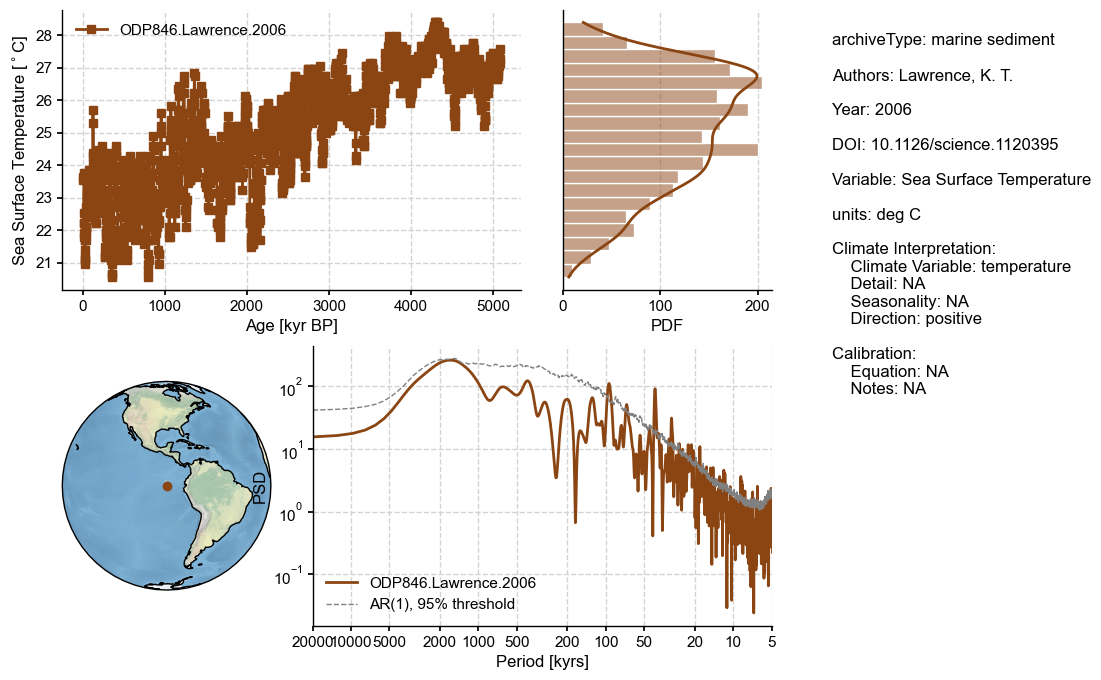

(<Figure size 1100x800 with 4 Axes>,
 {'ts': <AxesSubplot:xlabel='Age [kyr BP]', ylabel='Sea Surface Temperature [$^\\circ$C]'>,
  'dts': <AxesSubplot:xlabel='PDF'>,
  'map': <GeoAxesSubplot:>,
  'spec': <AxesSubplot:xlabel='Period [kyrs]', ylabel='PSD'>})

In [11]:
ts.dashboard()

Sea surface temperatures have decreased throughout the last 5M years, with cycles superimposed on the long-term cooling trend. The periodogram indicates significnat periodicities at 100kyr, 40kyr, and 23kyr, which corresponds to the eccentricity, obliquity, and precession cycles. 

Let's also load the benthic record that was used to compose the age model. The data is stored in the chron tables, which we indicate by using the `mode` parameter:

In [8]:
ts_benthic = D.to_LipdSeries(mode='chron')

extracting chronData...
extracting: ODP846.Lawrence.2006
Created time series: 3 entries
0 :  ODP846.Lawrence.2006 :  marine sediment :  depth
1 :  ODP846.Lawrence.2006 :  marine sediment :  age
2 :  ODP846.Lawrence.2006 :  marine sediment :  d18o
Enter the number of the variable you wish to use: 2


Let's rename our series:

In [9]:
ts_benthic.value_name = 'Benthic $\delta^{18}O$'
ts_benthic.value_unit = u'\u2030'

And do a simple plot of our results:

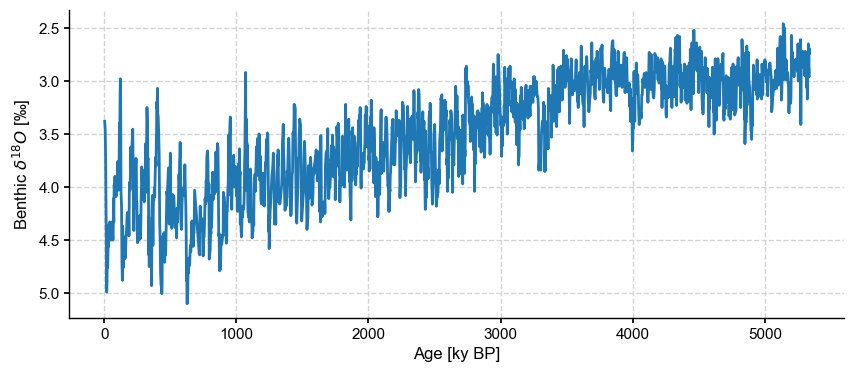

In [33]:
fig,ax = ts_benthic.plot(legend=False, mute=True)
ax.invert_yaxis() #flip the axis
pyleo.showfig(fig)

The benthic $\delta^{18}O$ record displays:
* a long-term cooling trend ($\delta^{18}O$ gets more positive over time) characteristic of late Neogene and Quaternary and increasing ice volume
* shorter term shifts that represent the ice ages and that are used for the alignment of this benthic record with the benthic stack (LR04). 

Let's load the benthic stack into a `LipdSeries` for comparison:

In [7]:
df = pd.read_csv('./data/LR04.csv',skiprows=4)
df.head()

,Time (ka),Benthic d18O (per mil),Standard error (per mil)
0,0.0,3.23,0.03
1,1.0,3.23,0.04
2,2.0,3.18,0.03
3,3.0,3.29,0.03
4,4.0,3.30,0.03


In [8]:
lr04 = pyleo.Series(time=df.iloc[:,0],value=df.iloc[:,1],value_name='Benthic $\delta^{18}O$',value_unit=u'\u2030',
                   time_name='Age',time_unit='ky BP',label='LR04')

And plot:

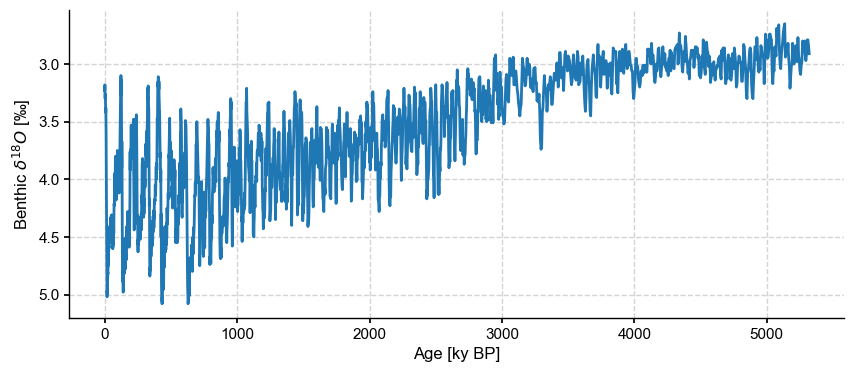

In [49]:
fig,ax = lr04.plot(legend=False, mute=True)
ax.invert_yaxis()
pyleo.showfig(fig)

Let's plot the series together on a [stackplot](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#pyleoclim.core.ui.MultipleSeries.stackplot). This functionality is enabled through Pyleoclim's [`MultipleSeries` object](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#multipleseries-pyleoclim-multipleseries), which can be created from a list of `Series` objects.

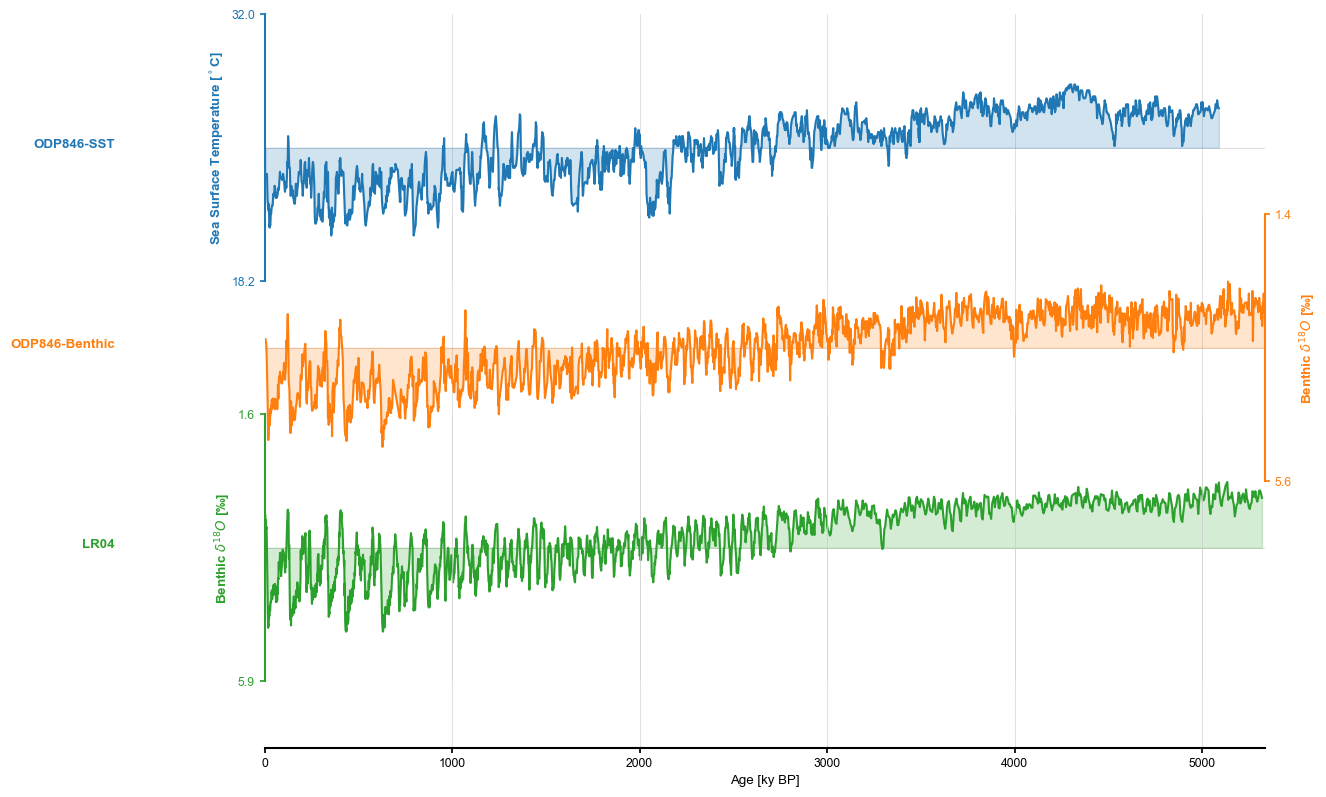

In [9]:
ms = pyleo.MultipleSeries([ts,ts_benthic,lr04])
fig,ax = ms.stackplot(figsize=[10,8],labels=['ODP846-SST','ODP846-Benthic','LR04'], mute=True)
ax[1].invert_yaxis()
ax[2].invert_yaxis()
pyleo.showfig(fig)

## <a name='analysis'>Spectral and Wavelet Analysis</a>

### <a name='benthic'>Benthic record</a>

Let's quickly examine the spectral content of the benthic record. Because the age model was obtained by aligning the record to the LR04 stack, which is orbitally tuned, we would expect to recover the orbital periodicities in the record.

Pyleoclim is capable of running both spectral and wavelet analysis, which give slightly different information about the timeseries.

For spectral analysis, Pyleoclim offers a [variety of methods](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#pyleoclim.core.ui.Series.spectral) (e.g., MTM, Welch, Lomb-Scargle...). Some are more appropriate to evenly-spaced datasets (e.g., Lomb-Scargle) than others. Let's first plot the time difference between adjacent samples for the record. 

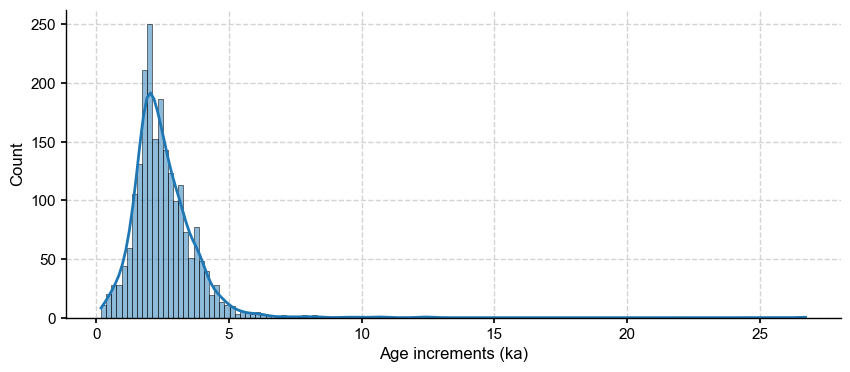

In [60]:
dt=np.diff(ts_benthic.time)
fig, ax = plt.subplots(figsize=[10,4])
sns.histplot(dt,kde=True,ax=ax)
ax.set_xlabel('Age increments (ka)')
pyleo.showfig(fig)

The data is evenly-spaced and therefore, traditional methods such as MTM, may not be appropriate for this dataset. Let's start with a Lomb-Scargle periodogram. 

We should also decided on any pre-processing steps. In this case, the long-term trend is of no interest and can be removed prior to analysis. Pyleoclim offers several [detrending methods](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#pyleoclim.core.ui.Series.detrend): 
* linear
* constant (the mean is removed from the series)
* Filtering through a Savitzky-Golay filter and removal of the low-frequency component. 
* Empirical mode decomposition and removal of the last mode, which corresponds to the low-frequency signal. 

Of these, the last two seem to be the most appropriate for the data since the long-term cooling is not linear. Let's run both and compare the results.

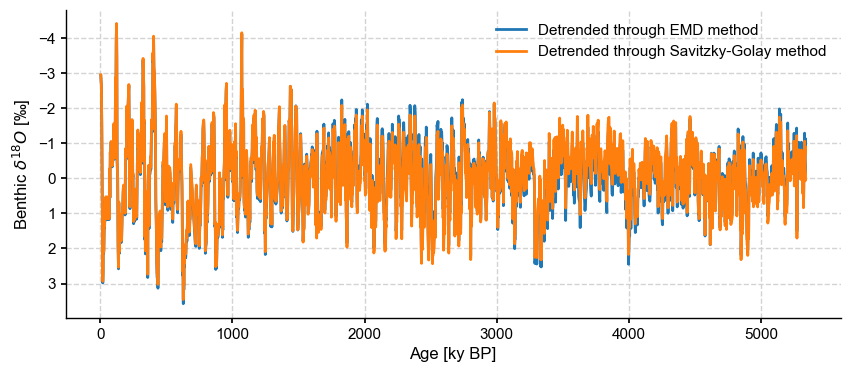

In [53]:
ts_benthic_emd = ts_benthic.detrend().standardize()
ts_benthic_emd.label = 'Detrended through EMD method'
ts_benthic_sv = ts_benthic.detrend(method = 'savitzky-golay').standardize()
ts_benthic_sv.label = 'Detrended through Savitzky-Golay method'
fig,ax = ts_benthic_emd.plot(mute=True)
ts_benthic_sv.plot(mute=True,ax=ax)
ax.invert_yaxis()
pyleo.showfig(fig)

The two detrending methods return very similar detrended time series and we will proceed with the default EMD method.

The Lomb-Scargle periodogram can then be obtained with the following line of code. For computational speed, all results have been stored in JSON format and can be reloaded from the next cell directly.

In [15]:
psd_benthic=ts_benthic.detrend().standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle', settings={'n50':5}).signif_test(number=1000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_benthic,'./data/psd_benthic.json')

Performing spectral analysis on individual series: 100%|█| 1000/1000 [12:50<00:0


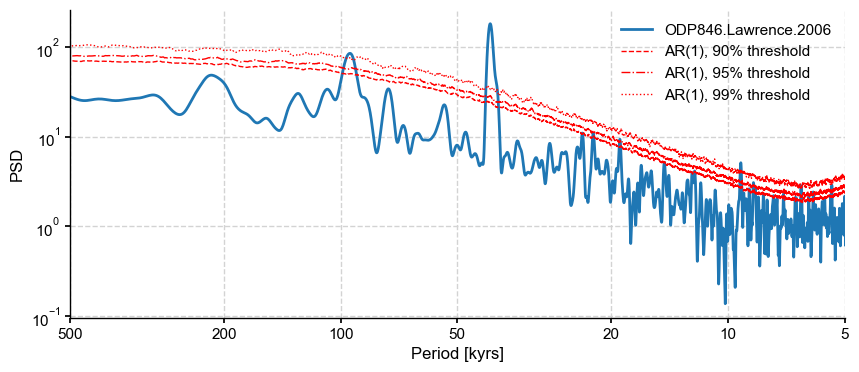

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Period [kyrs]', ylabel='PSD'>)

In [17]:
psd_benthic = pyleo.utils.jsonutils.json_to_PSD('./data/psd_benthic.json')
psd_benthic.plot(xlim=[500,5])

Unsurprsingly, the record displays periodicities around 40kyr and 100kyr. Why is this results not surprising? Remember that the age model was obtained by aligning the benthic record to the LR04 stack, which is itself orbitally tuned. If anything, this proved that the Lomb-Scargle method can recover periodicities that we embedded in the record by design. 

Another way to obtain the periodogram is to use the Weighted Wavelet Z-Transform ([WWZ](https://pyleoclim-util.readthedocs.io/en/master/utils/spectral/wwz_psd.html#utils-wwzpsd),[Foster](https://adsabs.harvard.edu/full/1996AJ....112.1709F), [Zhu](https://www.pnas.org/content/116/18/8728.short), which is also appropriate for unevenly-spaced data. 

**Note**: It takes 90min to run the next cell. You may want to load the results directly.

In [63]:
psd_benthic_wwz=ts_benthic.detrend().standardize().spectral(method='wwz').signif_test(number=1000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_benthic_wwz,'./data/psd_benthic_wwz.json')

Performing spectral analysis on individual series: 100%|█| 1000/1000 [1:28:47<00


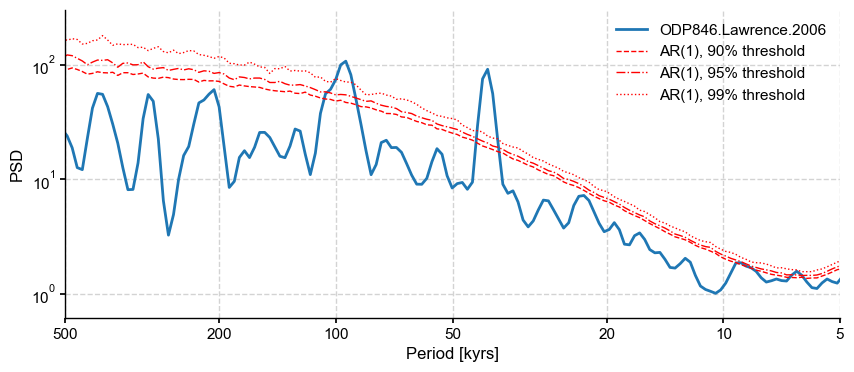

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Period [kyrs]', ylabel='PSD'>)

In [3]:
psd_benthic_wwz = pyleo.utils.jsonutils.json_to_PSD('./data/psd_benthic_wwz.json')
psd_benthic_wwz.plot(xlim=[500,5])

Next, let's run wavelet analysis using the same WWZ method. Wavelet gives us more information as to when the periodic signal is strongest in the record. 

**Note**: Again, this takes some time to run. You may want to upload the results from the JSON file.

In [10]:
scal_benthic_wwz=ts_benthic.detrend().standardize().wavelet(method='wwz').signif_test(number=1000)
pyleo.utils.jsonutils.PyleoObj_to_json(scal_benthic_wwz,'./data/scal_benthic_wwz.json')

Performing wavelet analysis on individual series: 100%|█| 1000/1000 [1:39:14<00:


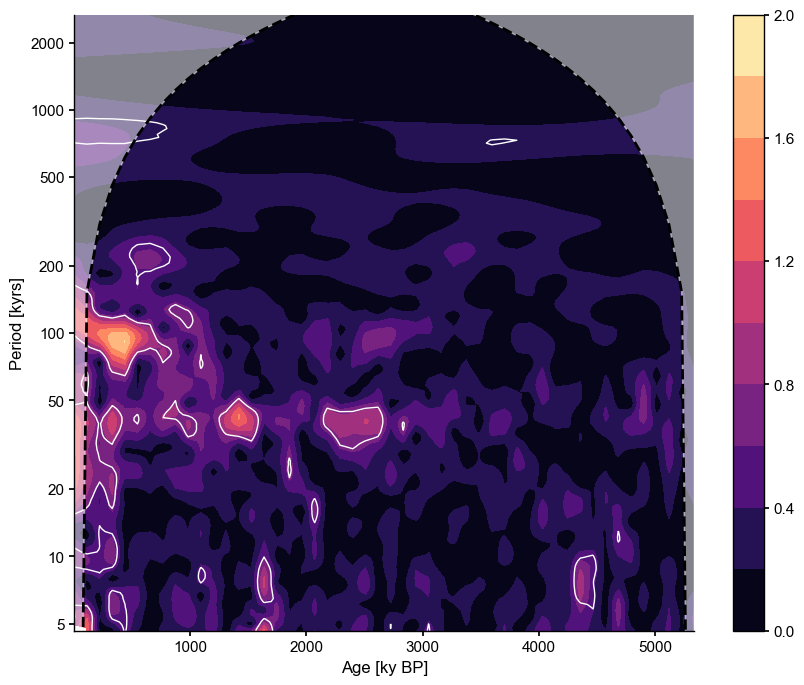

(<Figure size 1000x800 with 2 Axes>,
 <AxesSubplot:xlabel='Age [ky BP]', ylabel='Period [kyrs]'>)

In [4]:
scal_benthic_wwz = pyleo.utils.jsonutils.json_to_Scalogram('./data/scal_benthic_wwz.json')
scal_benthic_wwz.plot()

The scalogram reveals the non-stationary behavior of the periodicities revealed through spectral analysis related to the well-known mid-Pleistocene transition from a "41kyr world" to a "100kyr world" somewhere around 0.8Ma ([Paillard,2001](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2000RG000091)).

One can also create a [summary plot](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#pyleoclim.core.ui.Series.summary_plot) of the wavelet and spectral analysis (when doing so, make sure that both the periodogram and the scalogram were obtained with the same method):

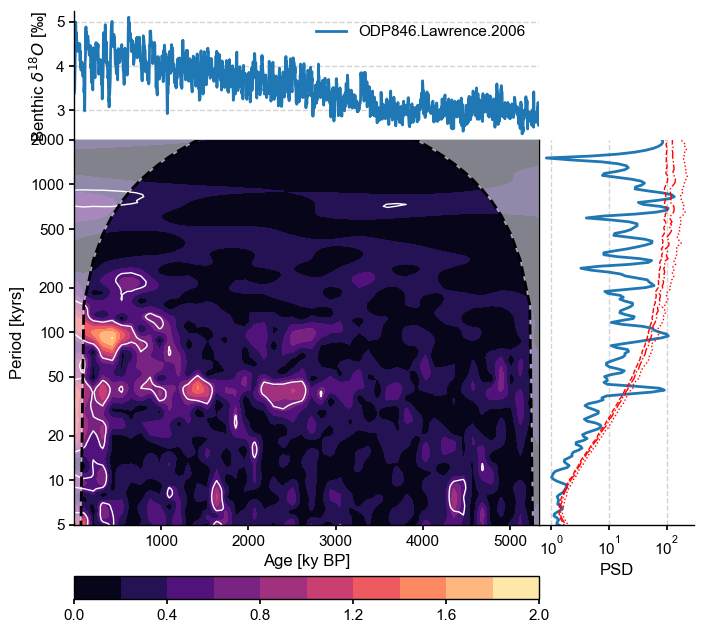

(<Figure size 800x1000 with 4 Axes>,
 {'ts': <AxesSubplot:xlabel='Age [ky BP]', ylabel='Benthic $\\delta^{18}O$ [‰]'>,
  'scal': <AxesSubplot:xlabel='Age [ky BP]', ylabel='Period [kyrs]'>,
  'psd': <AxesSubplot:xlabel='PSD'>})

In [10]:
ts_benthic.summary_plot(psd=psd_benthic_wwz,scalogram=scal_benthic_wwz)

### <a name='planktonic'> Planktonic record </a>

Let's repear our process with the planktonic data. In this case, the variations in SST were not aligned to the LR04 stack and are therefore not orbitally tuned. 

However, the data is still unevenly-spaced:

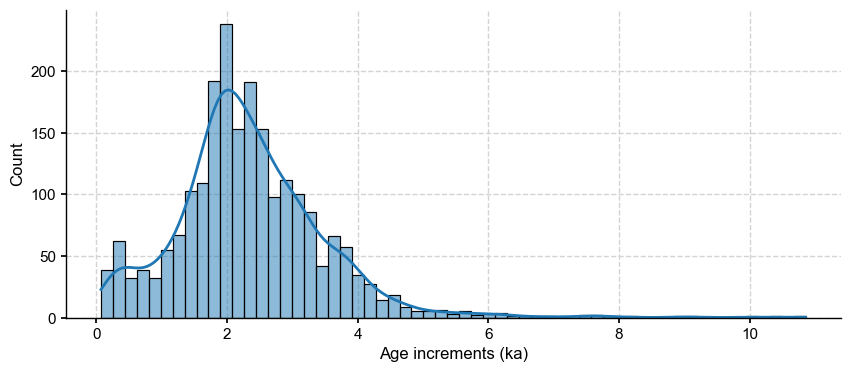

In [19]:
dt=np.diff(ts.time)
fig, ax = plt.subplots(figsize=[10,4])
sns.histplot(dt,kde=True,ax=ax)
ax.set_xlabel('Age increments (ka)')
pyleo.showfig(fig)

Again, let's look at detrending methods for pre-processing:

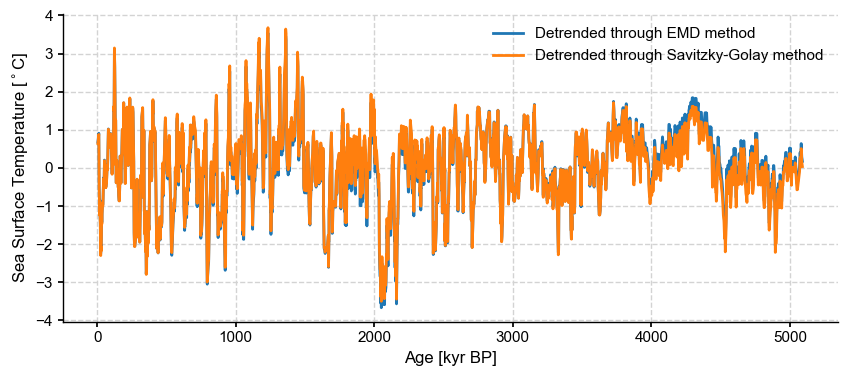

In [20]:
ts_emd = ts.detrend().standardize()
ts_emd.label = 'Detrended through EMD method'
ts_sv = ts.detrend(method = 'savitzky-golay').standardize()
ts_sv.label = 'Detrended through Savitzky-Golay method'
fig,ax = ts_emd.plot(mute=True)
ts_sv.plot(mute=True,ax=ax)
pyleo.showfig(fig)

Once again, the two are equivalent and we will proceed with the default EMD method. 

Let's obtain the Lomb-Scargle periodogram:

In [21]:
psd=ts.detrend().standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle', settings={'n50':5}).signif_test(number=1000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd,'./data/psd.json')

Performing spectral analysis on individual series: 100%|█| 1000/1000 [14:16<00:0


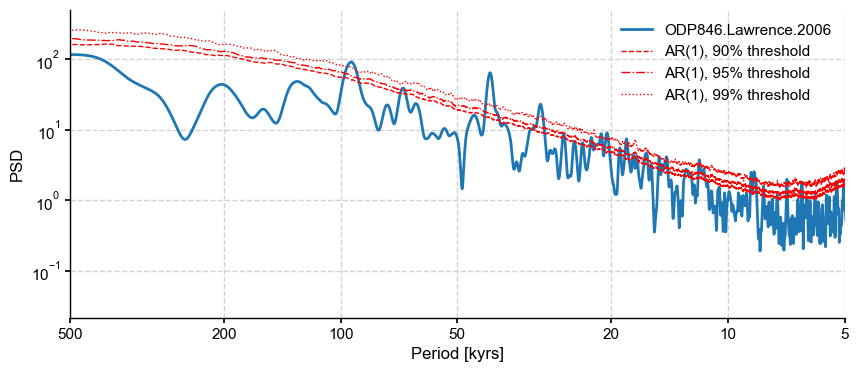

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Period [kyrs]', ylabel='PSD'>)

In [11]:
psd = pyleo.utils.jsonutils.json_to_PSD('./data/psd.json')
psd.plot(xlim=[500,5])

The record displays significant periodicities between 20kyr and 40kyr and 100kyr. Let's examine the robustness of these findings with the WWZ method.

In [23]:
psd_wwz=ts.detrend().standardize().spectral(method='wwz').signif_test(number=1000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_wwz,'./data/psd_wwz.json')

Performing spectral analysis on individual series: 100%|█| 1000/1000 [2:30:44<00


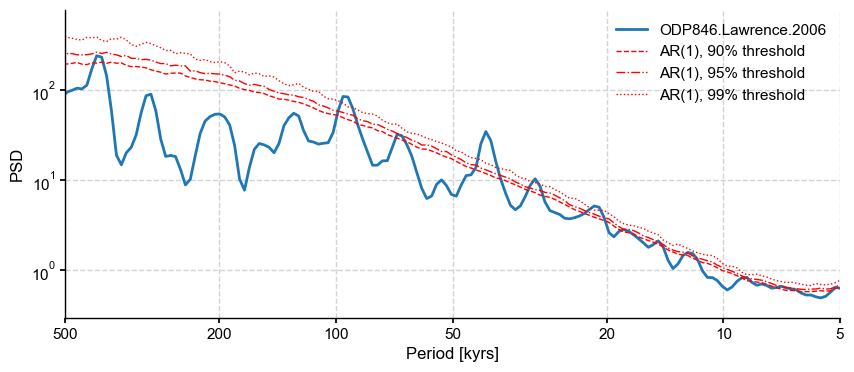

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Period [kyrs]', ylabel='PSD'>)

In [12]:
psd_wwz = pyleo.utils.jsonutils.json_to_PSD('./data/psd_wwz.json')
psd_wwz.plot(xlim=[500,5])

The two methods return qualitatively similar results, suggesting that these periodicities may be robust rather than a fluke of the statistical method. 

Next, let's run wavelet analysis to look at stationarity. 

In [25]:
scal_wwz=ts.detrend().standardize().wavelet(method='wwz').signif_test(number=1000)
pyleo.utils.jsonutils.PyleoObj_to_json(scal_wwz,'./data/scal_wwz.json')

Performing wavelet analysis on individual series: 100%|█| 1000/1000 [1:54:43<00:


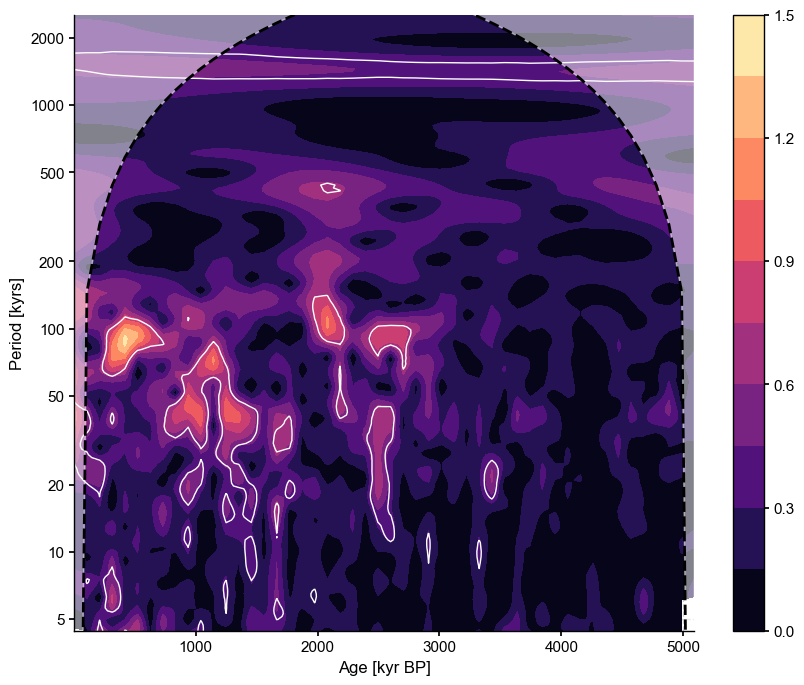

(<Figure size 1000x800 with 2 Axes>,
 <AxesSubplot:xlabel='Age [kyr BP]', ylabel='Period [kyrs]'>)

In [26]:
scal_wwz = pyleo.utils.jsonutils.json_to_Scalogram('./data/scal_wwz.json')
scal_wwz.plot()

Unlike the benthic record, there is no marked transtion between the "41kyr world" and the "100kyr world". Both periodicities are sporadically present within the first 3M years of the record. In addition, there is significant power in the 23kyr band.

**Hypothesis**: The periodic signals are driven by insolation at the equator.

## <a name='sol'> Relationship to Insolation </a>

For this exercise, we use the summer insolation curve from [Berger and Loutre (1991)](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.470.7313&rep=rep1&type=pdf) for the past 1M years.

In [28]:
df = pd.read_csv('./data/insolation.csv')
df.head()

,Age,90NJune,60NJune,30NJune,0 June,30SJune,60SJune,90SJune
0,0,523.30,475.95,473.93,384.08,212.28,22.76,0
1,-1,525.28,476.99,473.77,383.21,211.13,22.09,0
2,-2,528.91,479.55,475.14,383.58,210.69,21.50,0
3,-3,534.08,483.54,477.99,385.18,210.95,21.01,0
4,-4,540.56,488.77,482.12,387.87,211.84,20.63,0


In [33]:
sol = pyleo.Series(time=-df.iloc[:,0],value=df.iloc[:,4],value_name='Insolation',value_unit='$Wm^{-2}$',
                   time_name='Age',time_unit='ky BP',label='insolation')

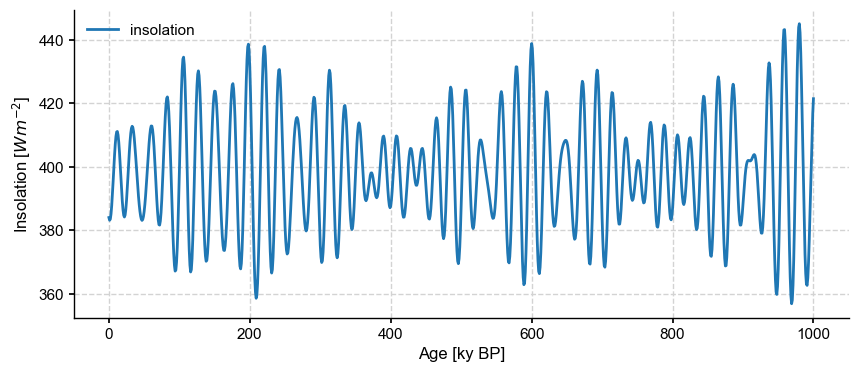

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Age [ky BP]', ylabel='Insolation [$Wm^{-2}$]'>)

In [34]:
sol.plot()

In [35]:
psd_sol=sol.standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle', settings={'n50':3}).signif_test(number=1000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_sol,'./data/psd_sol.json')

Performing spectral analysis on individual series: 100%|█| 1000/1000 [02:14<00:0


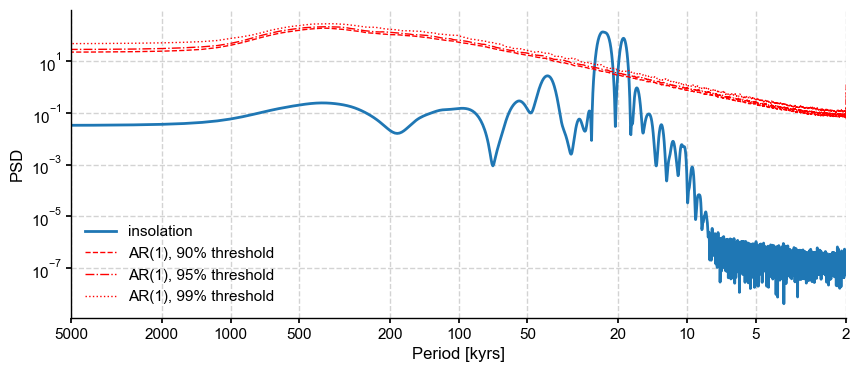

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Period [kyrs]', ylabel='PSD'>)

In [36]:
psd_sol = pyleo.utils.jsonutils.json_to_PSD('./data/psd_sol.json')
psd_sol.plot()

In [38]:
psd_sol_mtm=sol.standardize().spectral(method='mtm').signif_test(number=1000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_sol_mtm,'./data/psd_sol_mtm.json')

Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:37<00:0


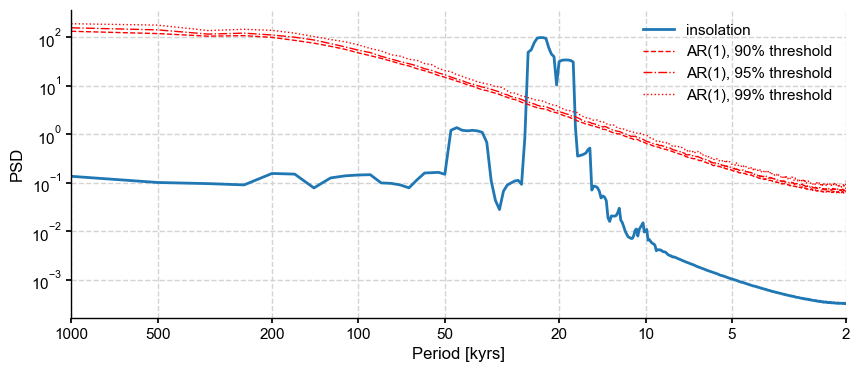

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Period [kyrs]', ylabel='PSD'>)

In [39]:
psd_sol_mtm = pyleo.utils.jsonutils.json_to_PSD('./data/psd_sol_mtm.json')
psd_sol_mtm.plot()

In [40]:
xwt=ts.detrend().standardize().wavelet_coherence(sol.standardize()).signif_test(number=1000)
pyleo.utils.jsonutils.PyleoObj_to_json(xwt,'./data/xwt.json')

Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [4:45:39<00:0


/Users/deborahkhider/opt/anaconda3/envs/paleodev/lib/python3.9/site-packages/pyleoclim/core/ui.py:3496: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("magma").copy()
  cmap.set_under(under_clr)
/Users/deborahkhider/opt/anaconda3/envs/paleodev/lib/python3.9/site-packages/pyleoclim/core/ui.py:3497: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("magma").copy()
  cmap.set_over(over_clr)
/Users/deborahkhider/opt/anaconda3/envs/paleodev/lib/python3.9/site-packages/pyleoclim/core/ui.py:3498: MatplotlibDeprec

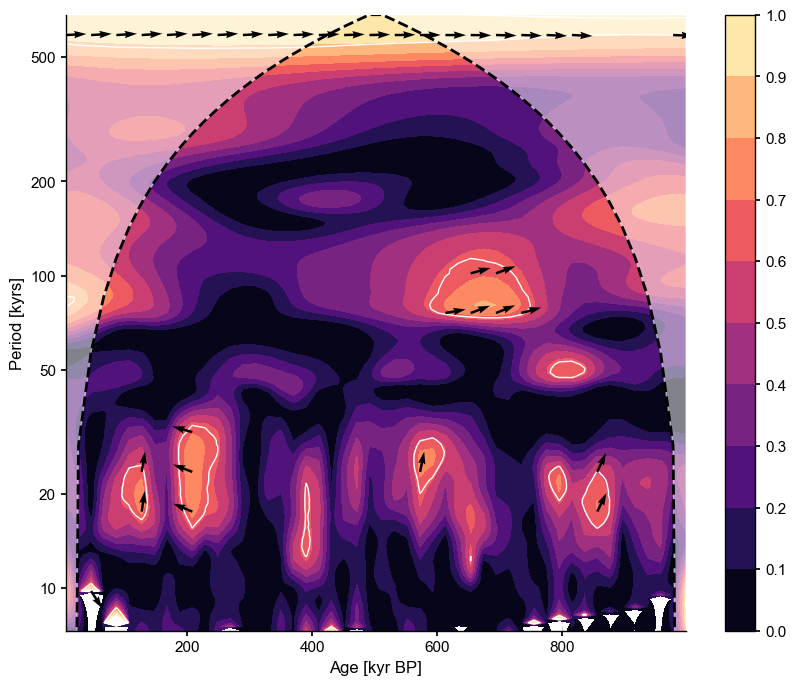

(<Figure size 1000x800 with 2 Axes>,
 <AxesSubplot:xlabel='Age [kyr BP]', ylabel='Period [kyrs]'>)

In [2]:
xwt = pyleo.utils.jsonutils.json_to_Coherence('./data/xwt.json')
xwt.plot()